In [1]:
import sys, os, time, datetime, csv
sys.path.insert(1, '/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/tools')
from tools import *
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm
from matplotlib.lines import Line2D

import pandas as pd

In [106]:
def plot_cartesian(filenames,n_section,n_files):
        fig, ax = plt.subplots(1,2,figsize = (10,5),sharey=True, tight_layout=True)
        cmap = plt.get_cmap('bwr_r')
        theta_counter = 0 # start 45 degree rotated
        total_false_edges = 0
        total_true_edges = 0
        for i in range(n_files):
            print('Plotting file: ' + filenames[i])
            X, Ri, Ro, y = load_graph(filenames[i])
            #print('Zmin: %.2f, Zmax: %.2f' %(min(X[:,2]),max(X[:,2]))   )
            X[:,1] = X[:,1] * np.pi/n_section
            theta = (X[:,1] + theta_counter)%(np.pi*2)
           
            ax[0].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)
            ax[1].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)

            #ax1.scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,2], c='k')

            feats_o = X[np.where(Ri.T)[1]]
            feats_i = X[np.where(Ro.T)[1]]

            x_o = 1000*feats_o[:,0]*np.cos(feats_o[:,1]+theta_counter)
            x_i = 1000*feats_i[:,0]*np.cos(feats_i[:,1]+theta_counter)
            y_o = 1000*feats_o[:,0]*np.sin(feats_o[:,1]+theta_counter)
            y_i = 1000*feats_i[:,0]*np.sin(feats_i[:,1]+theta_counter)

            # print only false edges
            for j in range(y.shape[0]):
                seg_args = dict(c='darkblue', alpha=1-y[j])
                ax[0].plot([x_o[j],x_i[j]],[y_o[j],y_i[j]], '-', **seg_args)

            
            # print only true edges
            for j in range(y.shape[0]):
                seg_args = dict(c='darkblue', alpha=y[j])
                ax[1].plot([x_o[j],x_i[j]],[y_o[j],y_i[j]], '-', **seg_args)

            # draw seperator line
            ax[0].plot([0,1100*np.cos(theta_counter-np.pi/n_section)],[0,1100*np.sin(theta_counter-np.pi/n_section)],'-', c='darkorange')
            ax[0].plot([0,1100*np.cos(theta_counter+np.pi/n_section)],[0,1100*np.sin(theta_counter+np.pi/n_section)],'-', c='darkorange')
            ax[1].plot([0,1100*np.cos(theta_counter-np.pi/n_section)],[0,1100*np.sin(theta_counter-np.pi/n_section)],'-', c='darkorange')
            ax[1].plot([0,1100*np.cos(theta_counter+np.pi/n_section)],[0,1100*np.sin(theta_counter+np.pi/n_section)],'-', c='darkorange')

            total_true_edges  += sum(y)
            total_false_edges += y.shape[0] - sum(y)

            theta_counter += 2*np.pi/n_section
            theta_counter = theta_counter%(np.pi*2)

        print('Plotting a graph with %d true, %d false, %d total edges'%(total_true_edges,total_false_edges,total_false_edges+total_true_edges))

        ax[0].set_xlabel('x [mm]')
        ax[0].set_ylabel('y [mm]')
        ax[1].set_xlabel('$x [mm]$')
        ax[1].set_ylabel('$y [mm]$')
        ax[0].set_aspect('equal')
        ax[1].set_aspect('equal')
        ax[0].set_title('Only Fake Edges (After Preprocessing)')
        ax[1].set_title('Only True Edges (After Preprocessing)')
       
        plt.show()

In [11]:
def plot_cartesian_single(filenames,n_section,n_files):
        fig, ax = plt.subplots(1,2,figsize = (10,5),sharey=True, tight_layout=True)
        cmap = plt.get_cmap('bwr_r')
        theta_counter = 0 # start 45 degree rotated
        total_false_edges = 0
        total_true_edges = 0
        
        print('Plotting file: ' + filenames)
        X, Ri, Ro, y = load_graph(filenames)
        #print('Zmin: %.2f, Zmax: %.2f' %(min(X[:,2]),max(X[:,2]))   )
        X[:,1] = X[:,1] * np.pi/n_section
        theta = (X[:,1] + theta_counter)%(np.pi*2)
        
        ax[0].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)
        ax[1].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)

        #ax1.scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,2], c='k')

        feats_o = X[np.where(Ri.T)[1]]
        feats_i = X[np.where(Ro.T)[1]]

        x_o = 1000*feats_o[:,0]*np.cos(feats_o[:,1]+theta_counter)
        x_i = 1000*feats_i[:,0]*np.cos(feats_i[:,1]+theta_counter)
        y_o = 1000*feats_o[:,0]*np.sin(feats_o[:,1]+theta_counter)
        y_i = 1000*feats_i[:,0]*np.sin(feats_i[:,1]+theta_counter)

        # print only false edges
        for j in range(y.shape[0]):
            seg_args = dict(c='darkblue', alpha=1-y[j])
            ax[0].plot([x_o[j],x_i[j]],[y_o[j],y_i[j]], '-', **seg_args)
        # print only true edges
        for j in range(y.shape[0]):
            seg_args = dict(c='darkblue', alpha=y[j])
            ax[1].plot([x_o[j],x_i[j]],[y_o[j],y_i[j]], '-', **seg_args)

        # draw seperator line
        ax[0].plot([0,1100*np.cos(theta_counter-np.pi/n_section)],[0,1100*np.sin(theta_counter-np.pi/n_section)],'-', c='darkorange')
        ax[0].plot([0,1100*np.cos(theta_counter+np.pi/n_section)],[0,1100*np.sin(theta_counter+np.pi/n_section)],'-', c='darkorange')
        ax[1].plot([0,1100*np.cos(theta_counter-np.pi/n_section)],[0,1100*np.sin(theta_counter-np.pi/n_section)],'-', c='darkorange')
        ax[1].plot([0,1100*np.cos(theta_counter+np.pi/n_section)],[0,1100*np.sin(theta_counter+np.pi/n_section)],'-', c='darkorange')

        total_true_edges  += sum(y)
        total_false_edges += y.shape[0] - sum(y)

        theta_counter += 2*np.pi/n_section
        theta_counter = theta_counter%(np.pi*2)

        print('Plotting a graph with %d true, %d false, %d total edges'%(total_true_edges,total_false_edges,total_false_edges+total_true_edges))

        ax[0].set_xlabel('x [mm]')
        ax[0].set_ylabel('y [mm]')
        ax[1].set_xlabel('$x [mm]$')
        ax[1].set_ylabel('$y [mm]$')
        ax[0].set_aspect('equal')
        ax[1].set_aspect('equal')
        ax[0].set_title('Only Fake Edges (After Preprocessing)')
        ax[1].set_title('Only True Edges (After Preprocessing)')
       
        plt.show()

In [3]:
def plot_3d(filenames,n_section,n_files):

    def change_view(az=20):
        ax.view_init(elev=10, azim=az%360)
        return ax 

    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    cmap = plt.get_cmap('bwr_r')
    theta_counter = np.pi/n_section # start 45 degree rotated
    for i in range(n_files):
        print('Plotting file: ' + filenames[i])
        X, Ri, Ro, y = load_graph(filenames[i])
        X[:,1] = X[:,1] * np.pi/n_section
        theta = (X[:,1] + theta_counter)%(np.pi*2)
           
        ax.scatter(1000*X[:,2],1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k',s=1)

        feats_o = X[np.where(Ri.T)[1]]
        feats_i = X[np.where(Ro.T)[1]]

        x_o = 1000*feats_o[:,0]*np.cos(feats_o[:,1]+theta_counter)
        x_i = 1000*feats_i[:,0]*np.cos(feats_i[:,1]+theta_counter)
        y_o = 1000*feats_o[:,0]*np.sin(feats_o[:,1]+theta_counter)
        y_i = 1000*feats_i[:,0]*np.sin(feats_i[:,1]+theta_counter)
        z_o = 1000*feats_o[:,2]
        z_i = 1000*feats_i[:,2]
        
        for j in range(y.shape[0]):
            seg_args = dict(c='C'+str(i), alpha=float(y[j]))
            ax.plot([z_o[j],z_i[j]],[x_o[j],x_i[j]],[y_o[j],y_i[j]],'-', **seg_args)
        
        if i%2==1:
            theta_counter += 2*np.pi/n_section
            theta_counter = theta_counter%(np.pi*2)
        
    ax.set_xlabel('$Z [mm]$')
    ax.set_ylabel('$X [mm]$')  
    ax.set_zlabel('$Y [mm]$') 
    ax.grid(b=None)
    change_view(45)
    ax.dist = 8 
    plt.show()

Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_graphs/event000001000_g000.npz


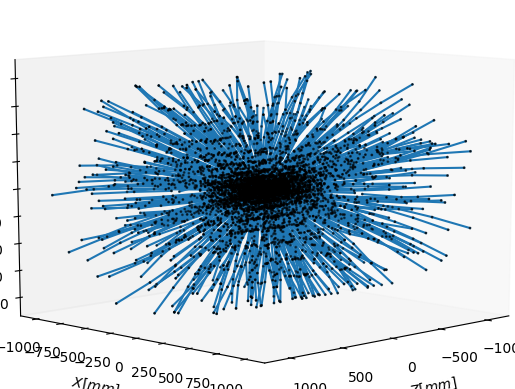

In [9]:
file_name='/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_graphs/event000001000_g000.npz'
n_section=1
n_files=1
i=0
%matplotlib inline

def change_view(az=20):
    ax.view_init(elev=10, azim=az%360)
    return ax 

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('bwr_r')
theta_counter = np.pi/n_section # start 45 degree rotated

print('Plotting file: ' + file_name)
X, Ri, Ro, y = load_graph(file_name)
X[:,1] = X[:,1] * np.pi/n_section
theta = (X[:,1] + theta_counter)%(np.pi*2)
    
ax.scatter(1000*X[:,2],1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k',s=1)

feats_o = X[np.where(Ri.T)[1]]
feats_i = X[np.where(Ro.T)[1]]

x_o = 1000*feats_o[:,0]*np.cos(feats_o[:,1]+theta_counter)
x_i = 1000*feats_i[:,0]*np.cos(feats_i[:,1]+theta_counter)
y_o = 1000*feats_o[:,0]*np.sin(feats_o[:,1]+theta_counter)
y_i = 1000*feats_i[:,0]*np.sin(feats_i[:,1]+theta_counter)
z_o = 1000*feats_o[:,2]
z_i = 1000*feats_i[:,2]

for j in range(y.shape[0]):
    seg_args = dict(c='C'+str(i), alpha=float(y[j]))
    ax.plot([z_o[j],z_i[j]],[x_o[j],x_i[j]],[y_o[j],y_i[j]],'-', **seg_args)

if i%2==1:
    theta_counter += 2*np.pi/n_section
    theta_counter = theta_counter%(np.pi*2)
    
ax.set_xlabel('$Z [mm]$')
ax.set_ylabel('$X [mm]$')  
ax.set_zlabel('$Y [mm]$') 
ax.grid(b=None)
change_view(45)
ax.dist = 8 
plt.show()



My data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_graphs/event000001000_g000.npz
Plotting a graph with 5162 true, 5511 false, 10673 total edges


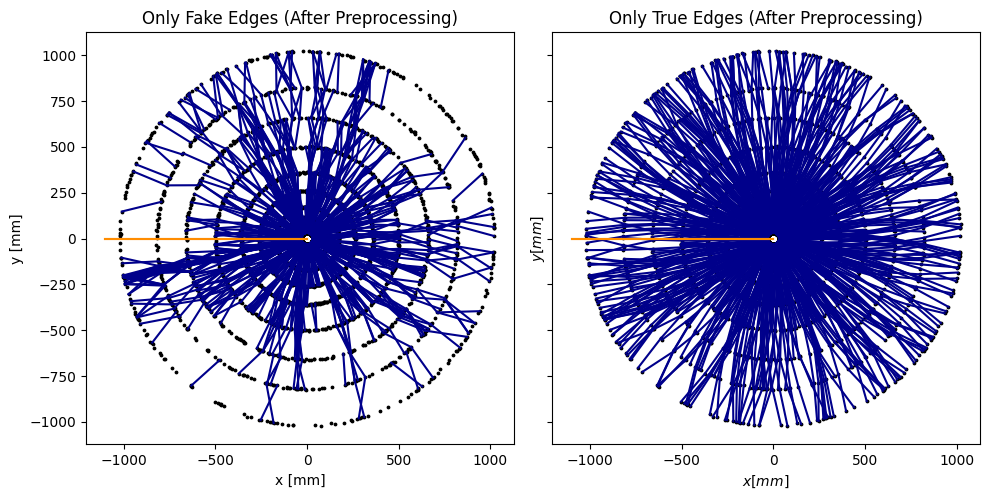

In [12]:
input_dir='/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_graphs'
n_section = 1
n_files = 1

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('My data:')
plot_cartesian_single(filenames[0],n_section,n_files)



Their data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train/event000001000_g000.npz
Plotting a graph with 5162 true, 5508 false, 10670 total edges


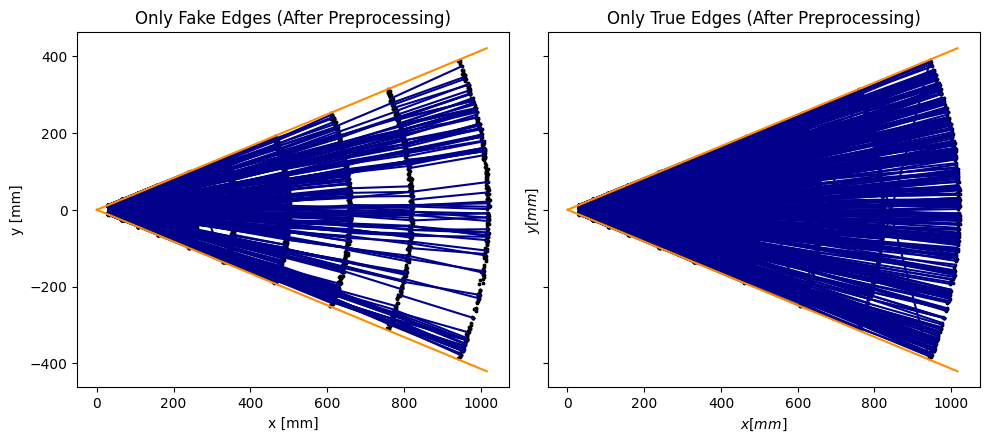

In [46]:
input_dir='/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train'
n_section = 8
n_files = 16

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('Their data:')
plot_cartesian_single(filenames[0],n_section,n_files)



### I've checked the file size, it looks like each of their files is 10x as large as mine (would have expected a factor of 16?)

My data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g000.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g001.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g002.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g003.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g004.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g005.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g006.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g007.npz
Plotting a graph with 3733 true

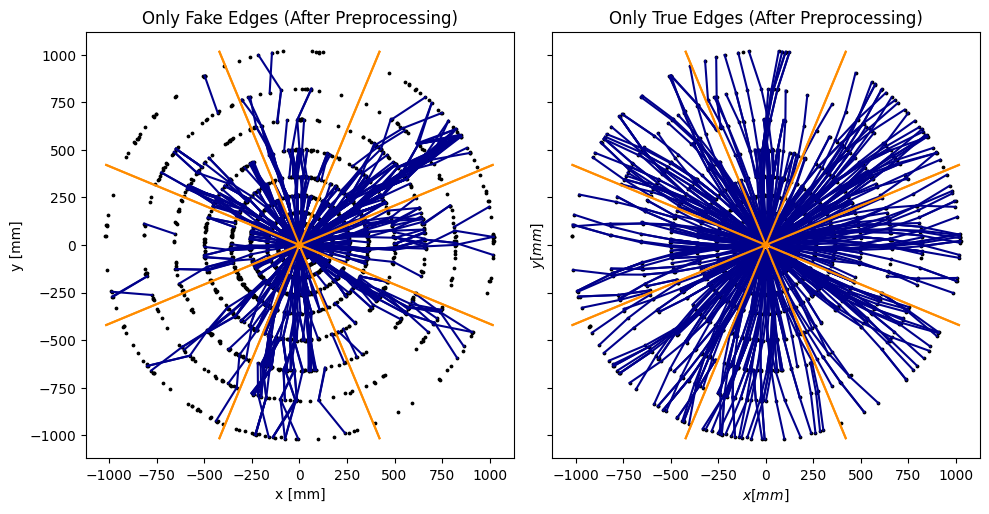

In [47]:
input_dir='/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new'
n_section = 8
n_files = 8

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('My data:')
plot_cartesian(filenames,n_section,n_files)



My data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train/event000001000_g000.npz
Plotting a graph with 5162 true, 5508 false, 10670 total edges


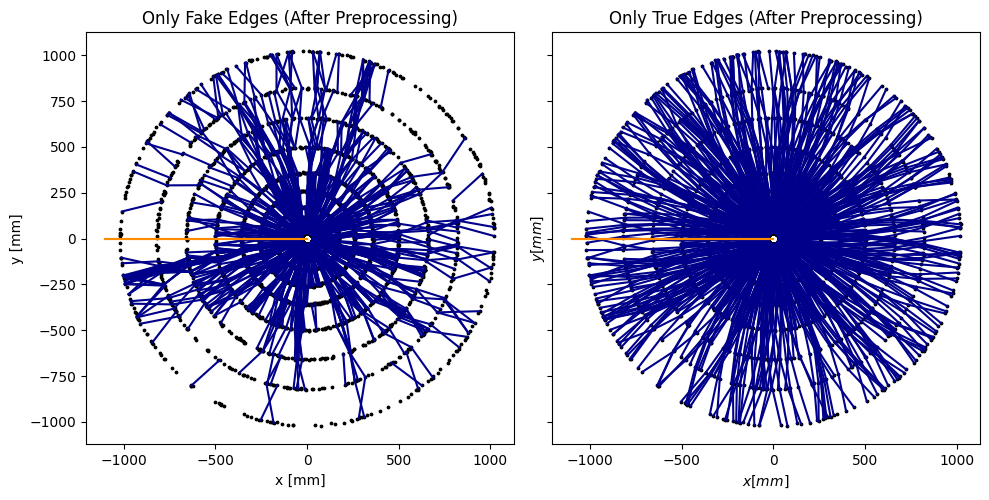

In [48]:
input_dir=r'/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train'
n_section = 1
n_files = 1

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('My data:')
plot_cartesian(filenames,n_section,n_files)



My data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g000.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g001.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g002.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g003.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g004.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g005.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g006.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g007.npz
Plotting file: /Users/lucascurt

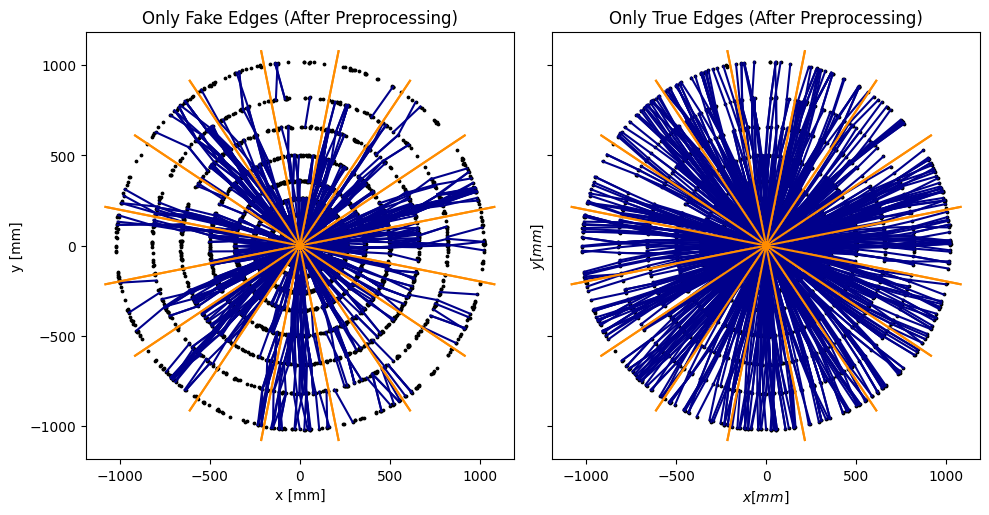

In [49]:
input_dir='/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new'
n_section = 16
n_files = 16

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('My data:')
plot_cartesian(filenames,n_section,n_files)



# Piecewise test 1: Normal pre-processing but condensed into one file (similar to Tuysuz)

My data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_1event/event000001000_g000.npz
Plotting a graph with 7594 true, 8249 false, 15843 total edges


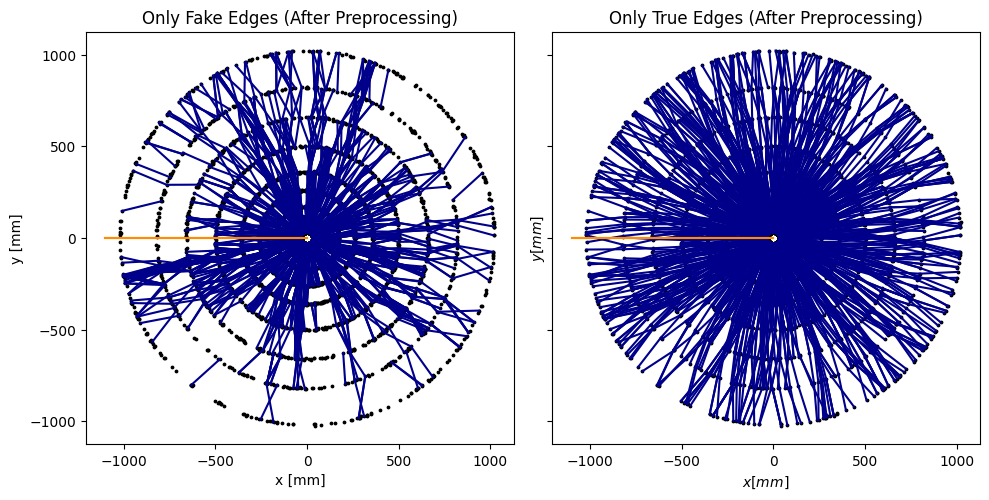

In [53]:
input_dir=r'/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_1event'
n_section = 1
n_files = 1

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('My data:')
plot_cartesian(filenames,n_section,n_files)



My data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_1event/event000001000_g000.npz
Plotting a graph with 7594 true, 8249 false, 15843 total edges


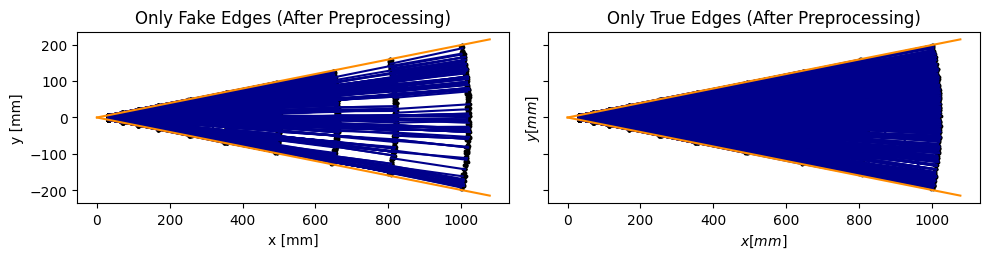

In [51]:
input_dir=r'/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_1event'
n_section = 16
n_files = 1

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('My data:')
plot_cartesian(filenames,n_section,n_files)



# Piecewise test 2: We've seemed to recreate Tuysuz's data, why arent the 16 subgraphs comparing correctly?

My data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_16events/event000001000_g000.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_16events/event000001000_g001.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_16events/event000001000_g002.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_16events/event000001000_g003.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_16events/event000001000_g004.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_16events/event000001000_g005.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_16events/event000001000_g006.npz
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_16events/event000001000_g007.npz
Plottin

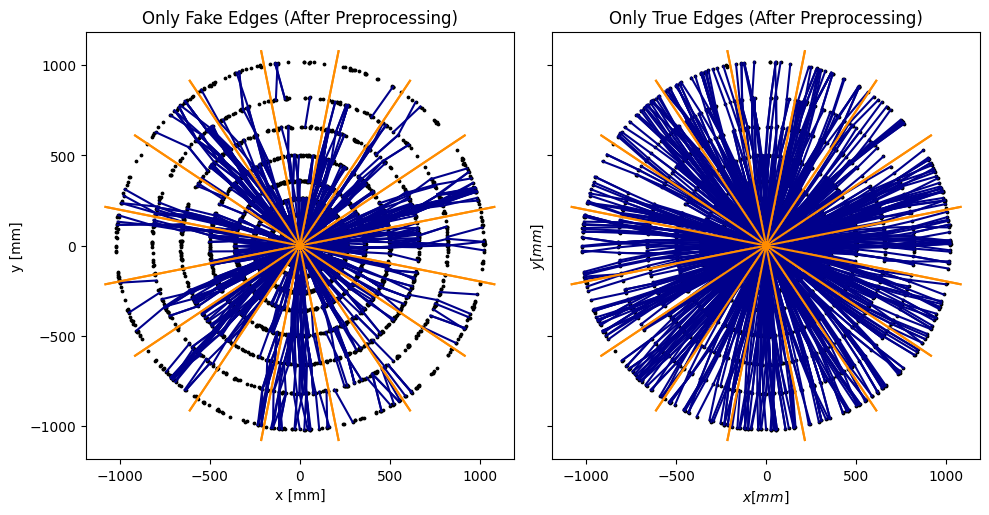

In [31]:
input_dir=r'/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/cut_16events'
n_section = 16
n_files = 16

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('My data:')
plot_cartesian(filenames,n_section,n_files)



# Marcin Comparison

In [17]:
cols = [ 'edge', 'label', 'eta', 'phi', 'true_pt', 'layer', 'track_length', 'hit1_id', 'hit2_id', 'particle_num'] #suggested column names
event = pd.DataFrame(np.load('/Users/lucascurtin/Desktop/event_1000/edges_preprocessed_000001000 (1).npy',allow_pickle = True), columns = cols)

In [50]:
true_events=event.loc[event['label'] == 1]

fake_events=event.loc[event['label'] == 0]


Despite me not being to exactly execute Marcin's code, I've found that his number of edges aligns with Tuysuz's one nearly perfectly (off by 3 which could be explained by edge cases possibly?) This means the error lies with how I'm splitting up the code most likely. 

## Plot Reconstruction

So we want to do is to get the edge, get the x y coordinates of each input and output node, plot them with a line between them

In [85]:
x_input=[]
y_input=[]

x_output=[]
y_output=[]

for i in range(len(fake_events)):
    r_i,theta_i,z_i=fake_events['edge'].iloc[i][0:3]
    r_o,theta_o,z_o=fake_events['edge'].iloc[i][3:6]

    x_i=r_i*np.cos(theta_i)
    y_i=r_i*np.sin(theta_i)
    x_input.append(x_i)
    y_input.append(y_i)


    x_o=r_o*np.cos(theta_o)
    y_o=r_o*np.sin(theta_o)
    x_output.append(x_o)
    y_output.append(y_o)



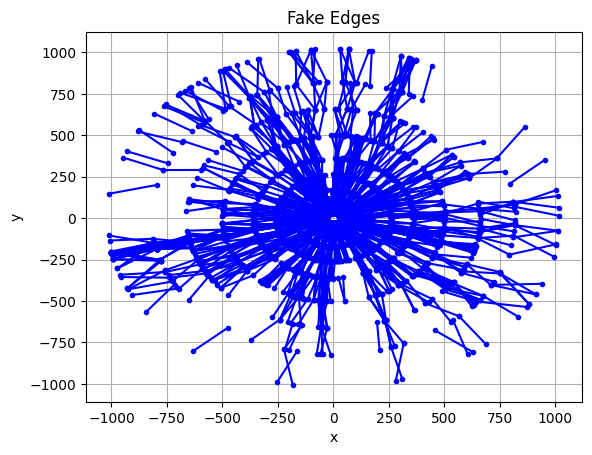

In [87]:
#plt.scatter(x_input, y_input,label='input')
#plt.scatter(x_output,y_output, label='output')
plt.grid()


for i in range(len(x_input)):
    plt.plot([x_input[i],x_output[i]],[y_input[i],y_output[i]],'b.-')


plt.title('Fake Edges')
plt.ylabel("y")
plt.xlabel("x")

plt.show()

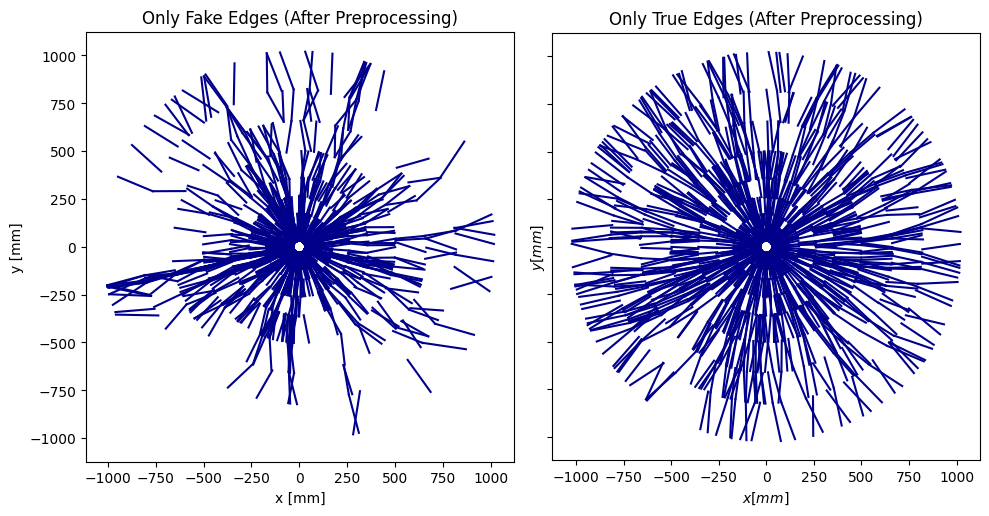

In [104]:
fig, ax = plt.subplots(1,2,figsize = (10,5),sharey=True, tight_layout=True)
cmap = plt.get_cmap('bwr_r')
theta_counter = 0 # start 45 degree rotated
total_false_edges = 0
total_true_edges = 0



x_input=[]
y_input=[]

x_output=[]
y_output=[]


#fake events

for i in range(len(fake_events)):
    r_i,theta_i,z_i=fake_events['edge'].iloc[i][0:3]
    r_o,theta_o,z_o=fake_events['edge'].iloc[i][3:6]

    x_i=r_i*np.cos(theta_i)
    y_i=r_i*np.sin(theta_i)
    x_input.append(x_i)
    y_input.append(y_i)


    x_o=r_o*np.cos(theta_o)
    y_o=r_o*np.sin(theta_o)
    x_output.append(x_o)
    y_output.append(y_o)




# print only false edges
for j in range(len(fake_events)):
    seg_args = dict(c='darkblue', alpha=1-y[j])
    ax[0].plot([x_output[j],x_input[j]],[y_output[j],y_input[j]], '-', **seg_args)




#true events
x_input=[]
y_input=[]

x_output=[]
y_output=[]

for i in range(len(true_events)):
    r_i,theta_i,z_i=true_events['edge'].iloc[i][0:3]
    r_o,theta_o,z_o=true_events['edge'].iloc[i][3:6]

    x_i=r_i*np.cos(theta_i)
    y_i=r_i*np.sin(theta_i)
    x_input.append(x_i)
    y_input.append(y_i)


    x_o=r_o*np.cos(theta_o)
    y_o=r_o*np.sin(theta_o)
    x_output.append(x_o)
    y_output.append(y_o)



# print only true edges
for j in range(len(true_events)):
    seg_args = dict(c='darkblue', alpha=y[j])
    ax[1].plot([x_output[j],x_input[j]],[y_output[j],y_input[j]], '-', **seg_args)

ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('y [mm]')
ax[1].set_xlabel('$x [mm]$')
ax[1].set_ylabel('$y [mm]$')
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[0].set_title('Only Fake Edges (After Preprocessing)')
ax[1].set_title('Only True Edges (After Preprocessing)')

plt.show()

In [110]:
print('Number of Fake events',len(fake_events))
print('Number of True events',len(true_events))

Number of Fake events 5511
Number of True events 5162


My data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train/event000001000_g000.npz
Plotting a graph with 5162 true, 5508 false, 10670 total edges


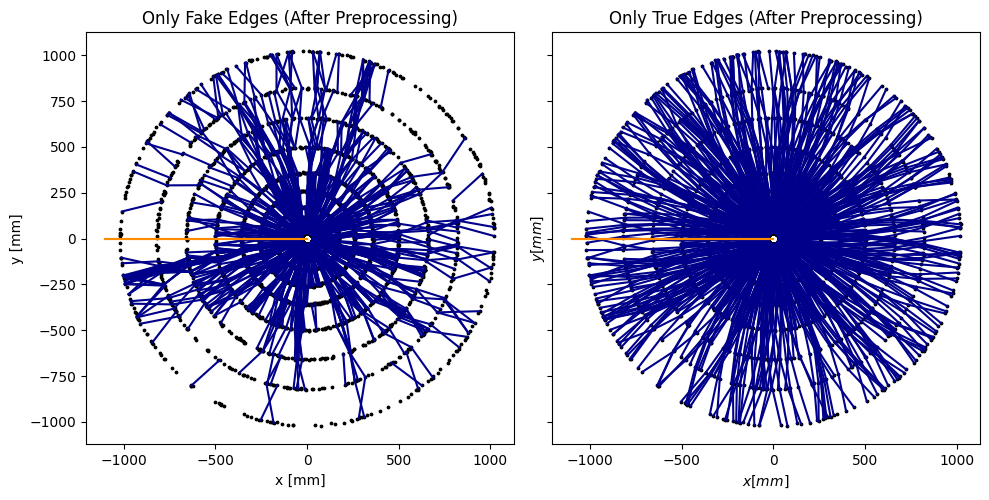

In [109]:
input_dir=r'/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train'
n_section = 1
n_files = 1

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('My data:')
plot_cartesian(filenames,n_section,n_files)



# Going to see if we can get the original Tuysuz Data into a Pandas DF

In [88]:
graph=np.load('/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train/event000001000_g000.npz')

In [114]:
X, Ri, Ro, y = load_graph('/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train/event000001000_g000.npz')

In [112]:
X, Ri, Ro, y = load_graph('/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train/event000001000_g000.npz')
#print('Zmin: %.2f, Zmax: %.2f' %(min(X[:,2]),max(X[:,2]))   )
X[:,1] = X[:,1] * np.pi/n_section
theta = (X[:,1] + theta_counter)%(np.pi*2)

ax[0].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)
ax[1].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)

#ax1.scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,2], c='k')

feats_o = X[np.where(Ri.T)[1]]
feats_i = X[np.where(Ro.T)[1]]

x_o = 1000*feats_o[:,0]*np.cos(feats_o[:,1]+theta_counter)
x_i = 1000*feats_i[:,0]*np.cos(feats_i[:,1]+theta_counter)
y_o = 1000*feats_o[:,0]*np.sin(feats_o[:,1]+theta_counter)
y_i = 1000*feats_i[:,0]*np.sin(feats_i[:,1]+theta_counter)


array([0.03144621, 0.8504313 , 0.0595952 ], dtype=float32)

In [115]:
X[:,1] #This grabs the second element of each spatial coordinate, which I guess is theta? But then they multiply it by pi

array([0.8504313 , 0.84666234, 0.8430469 , ..., 0.7734815 , 0.787495  ,
       0.80558014], dtype=float32)